Consider the following Python dictionary `data` and Python list `labels`:

``` python
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
```

**1.** Create a DataFrame `df` from this dictionary `data` which has the index `labels`.

In [1]:
import pandas as pd
import numpy as np

data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

df = pd.DataFrame(data, index=labels)

**2.** Display a summary of the basic information about this DataFrame and its data (*hint: there is a single method that can be called on the DataFrame*).

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, a to j
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   animal    10 non-null     object 
 1   age       8 non-null      float64
 2   visits    10 non-null     int64  
 3   priority  10 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 400.0+ bytes


**3.** Return the first 3 rows of the DataFrame `df`.

In [3]:
df.head(3)

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no


**4.** Display the 'animal' and 'age' columns from the DataFrame `df`

In [4]:
df[['animal', 'age']]

,animal,age
a,cat,2.5
b,cat,3.0
c,snake,0.5
d,dog,NaN
e,dog,5.0
f,cat,2.0
g,snake,4.5
h,cat,NaN
i,dog,7.0
j,dog,3.0


**5.** Display the data in rows `[3, 4, 8]` *and* in columns `['animal', 'age']'

In [5]:
df.loc[df.index[[3, 4, 8]], ['animal', 'age']]

,animal,age
d,dog,NaN
e,dog,5.0
i,dog,7.0


**6.** Select only the rows where the number of visits is greater than 3.

In [6]:
df[df['visits'] > 3]

,animal,age,visits,priority


**7.** Select the rows where the age is missing, i.e. it is `NaN`.

In [7]:
df[df['age'].isnull()]

,animal,age,visits,priority
d,dog,NaN,3,yes
h,cat,NaN,1,yes


**8.** Select the rows where the animal is a cat *and* the age is less than 3.

In [8]:
df[(df['animal'] == 'cat') & (df['age'] < 3)]

,animal,age,visits,priority
a,cat,2.5,1,yes
f,cat,2.0,3,no


**9.** Select the rows where the age is between 2 and 4 (inclusive)

In [9]:
df[(df['age'] >= 2) & (df['age'] <= 4)]

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
f,cat,2.0,3,no
j,dog,3.0,1,no


**10.** Change the age in row 'f' to 1.5.

In [10]:
df.loc['f', 'age'] = 1.5

**11.** Calculate the sum of all visits in `df` (i.e. the total number of visits).

In [11]:
total_visits = df['visits'].sum()
print(total_visits)

19


**12.** Calculate the mean age for each different animal in `df`.

In [12]:
mean_age_by_animal = df.groupby('animal')['age'].mean()
print(mean_age_by_animal)

animal
cat      2.333333
dog      5.000000
snake    2.500000
Name: age, dtype: float64


**13.** Append a new row 'k' to `df` with your choice of values for each column. Then delete that row to return the original DataFrame.

In [13]:
new_row = pd.Series({'animal': 'lion', 'age': 4, 'visits': 2, 'priority': 'yes'}, name='k')
df = df.append(new_row)

# Display the DataFrame with the new row
print(df)

# Delete the row 'k' to return the original DataFrame
df = df.drop('k')

# Display the original DataFrame
print(df)

  animal  age  visits priority
a    cat  2.5       1      yes
b    cat  3.0       3      yes
c  snake  0.5       2       no
d    dog  NaN       3      yes
e    dog  5.0       2       no
f    cat  1.5       3       no
g  snake  4.5       1       no
h    cat  NaN       1      yes
i    dog  7.0       2       no
j    dog  3.0       1       no
k   lion  4.0       2      yes
  animal  age  visits priority
a    cat  2.5       1      yes
b    cat  3.0       3      yes
c  snake  0.5       2       no
d    dog  NaN       3      yes
e    dog  5.0       2       no
f    cat  1.5       3       no
g  snake  4.5       1       no
h    cat  NaN       1      yes
i    dog  7.0       2       no
j    dog  3.0       1       no


C:\Users\USER\AppData\Local\Temp\ipykernel_15044\1541610182.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row)


**14.** Count the number of each type of animal in `df`.

In [14]:
animal_counts = df['animal'].value_counts()
print(animal_counts)

cat      4
dog      4
snake    2
Name: animal, dtype: int64


**15.** Sort `df` first by the values in the 'age' in *decending* order, then by the value in the 'visits' column in *ascending* order (so row `i` should be first, and row `d` should be last).

In [15]:
df_sorted = df.sort_values(by=['age', 'visits'], ascending=[False, True])
print(df_sorted)

  animal  age  visits priority
i    dog  7.0       2       no
e    dog  5.0       2       no
g  snake  4.5       1       no
j    dog  3.0       1       no
b    cat  3.0       3      yes
a    cat  2.5       1      yes
f    cat  1.5       3       no
c  snake  0.5       2       no
h    cat  NaN       1      yes
d    dog  NaN       3      yes


**16.** The 'priority' column contains the values 'yes' and 'no'. Replace this column with a column of boolean values: 'yes' should be `True` and 'no' should be `False`.

In [16]:
df['priority'] = df['priority'].map({'yes': True, 'no': False})
print(df)

  animal  age  visits  priority
a    cat  2.5       1      True
b    cat  3.0       3      True
c  snake  0.5       2     False
d    dog  NaN       3      True
e    dog  5.0       2     False
f    cat  1.5       3     False
g  snake  4.5       1     False
h    cat  NaN       1      True
i    dog  7.0       2     False
j    dog  3.0       1     False


**17.** In the 'animal' column, change the 'snake' entries to 'python'.

In [17]:
df['animal'] = df['animal'].replace('snake', 'python')
print(df)

   animal  age  visits  priority
a     cat  2.5       1      True
b     cat  3.0       3      True
c  python  0.5       2     False
d     dog  NaN       3      True
e     dog  5.0       2     False
f     cat  1.5       3     False
g  python  4.5       1     False
h     cat  NaN       1      True
i     dog  7.0       2     False
j     dog  3.0       1     False


**18.** Load the ny-flights dataset to Python

In [21]:
import seaborn as sns

flights = pd.read_csv('ny-flights.csv')
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20817 entries, 0 to 20816
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   fl_date         20817 non-null  object 
 1   unique_carrier  20817 non-null  object 
 2   airline_id      20817 non-null  int64  
 3   tail_num        20512 non-null  object 
 4   fl_num          20817 non-null  int64  
 5   origin          20817 non-null  object 
 6   dest            20817 non-null  object 
 7   dep_time        18462 non-null  float64
 8   dep_delay       18462 non-null  float64
 9   arr_time        18412 non-null  float64
 10  arr_delay       18383 non-null  float64
 11  cancelled       20817 non-null  float64
 12  arr             18412 non-null  object 
 13  dep             18462 non-null  object 
dtypes: float64(5), int64(2), object(7)
memory usage: 2.2+ MB


**19.** Which airline ID is present maximum times in the dataset

In [22]:
max_airline_id = flights['airline_id'].value_counts().idxmax()
print(f"The airline ID present the maximum number of times is: {max_airline_id}")

The airline ID present the maximum number of times is: 20409


**20.** Draw a plot between dep_delay and arr_delay

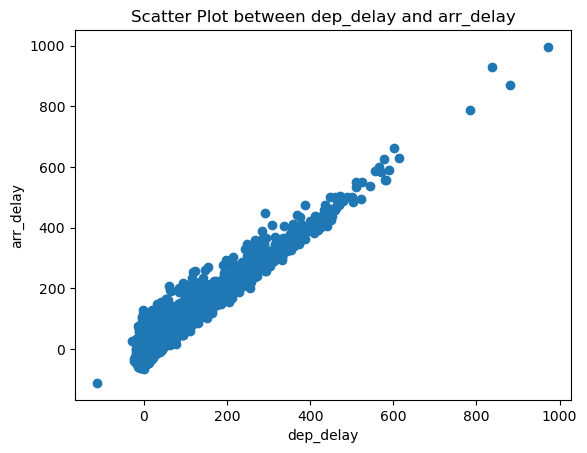

In [24]:
import matplotlib.pyplot as plt

x=flights.dep_delay
y=flights.arr_delay
plt.scatter(x,y)
plt.xlabel('dep_delay')
plt.ylabel('arr_delay')
plt.title('Scatter Plot between dep_delay and arr_delay')
plt.show()